**Project:** Sentiment Analysis of [Amazon Product Reviews](https://www.kaggle.com/datasets/arhamrumi/amazon-product-reviews)

**Author:** [Giuseppe Muschetta](https://github.com/peppe212)

**Python version:** 3.8

## RULE-BASED MODEL USING BING LIU LEXICON 
**Rule-Based Model:** [Bing Liu Lexicon](https://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html#lexicon)

In [1]:
# Sopprimiamo i fastidiosissimi warnings
import warnings
warnings.filterwarnings('ignore')

# Librerie
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Impostazioni dello stile Seaborn in ambiente globale
sns.set(
    style='whitegrid',
    palette='pastel',
    context='notebook',
    font_scale=1.1,
    rc={'lines.linewidth': 2, 'grid.linestyle': '--'}
)
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# IMPOSTAZIONE DEI PATH in ingresso e uscita
# impostiamo il path di input per il dataset
# utilizzeremo il dataset contenente testo già ripulito
input_dataset_path = "Dataset/cleaned_reviews.csv"

# imposto il path di salvataggio delle figure
images_bing_liu_path = "Images/Bing_Liu_Lexicon/"

# impostiamo i path per il lessico
input_lexicon_positive_path = "bing_liu_lexicon_english/positive-words.txt"
input_lexicon_negative_path = "bing_liu_lexicon_english/negative-words.txt"

In [3]:
# CARICHIAMO IL DATASET RIPULITO E IL BING LIU LEXICON
df = pd.read_csv(input_dataset_path)

# funzione che legge i due file di testo a partire dal path di input
def load_lexicon(file_path):
    with open(file_path, 'r', encoding='latin-1') as file:
        words = set(file.read().strip().split())
    return words

positive_words = load_lexicon(input_lexicon_positive_path)
negative_words = load_lexicon(input_lexicon_negative_path)

In [4]:
df.head()

,sentiment,cleaned_text
0,0,ok not ingredient barbecue sauce hardly taste ...
1,0,granola right ingredient nuts coconut somehow ...
2,0,I past enjoy however I receive weak neither si...
3,0,I try sans sucre vanilla mousse like even I fa...
4,1,I usually not like black herbal tea but I able...


### RULE-BASED MODEL IN ACTION

In [5]:
def sentiment_score_bing_liu(text, positive_words, negative_words):
    """
    Calcola il sentiment score basato sul conteggio delle parole positive e negative.
    """
    positive_count = 0
    negative_count = 0
    words = text.split()

    for word in words:
        if word in positive_words:
            positive_count += 1
        elif word in negative_words:
            negative_count += 1

    # Calcolo lo score come la differenza tra conteggi positivi e negativi
    # Da qui si vede il funzionamento basilare del rule-based method
    score = positive_count - negative_count
    return score

# Interpeto così per fare successivamente predizioni e confrontare
def interpret_score(score):
    """
    Interpreta il sentiment score: 1 per positivo, 0 per negativo.
    """
    return 1 if score > 0 else 0


# Applica la funzione di sentiment a ciascuna recensione nella colonna cleaned_text
df['sentiment_score'] = df['cleaned_text'].apply(lambda x: sentiment_score_bing_liu(x, positive_words, negative_words))
df['predicted_sentiment'] = df['sentiment_score'].apply(interpret_score)

In [6]:
# da qui vediamo lo score sentiment e le predizioni fatte dal modello rule-based
df.head(20)

,sentiment,cleaned_text,sentiment_score,predicted_sentiment
0,0,ok not ingredient barbecue sauce hardly taste ...,-3,0
1,0,granola right ingredient nuts coconut somehow ...,-2,0
2,0,I past enjoy however I receive weak neither si...,2,1
3,0,I try sans sucre vanilla mousse like even I fa...,-1,0
4,1,I usually not like black herbal tea but I able...,7,1
5,1,I love raw cacao powder such great taste I raw...,3,1
6,0,delicious but send melt I melt I guess expire ...,1,1
7,0,taste little off I like microwave popcorn not ...,7,1
8,1,die heal skin inside concern recommend highly ...,-1,0
9,0,first try eat could not look ingredient find m...,1,1


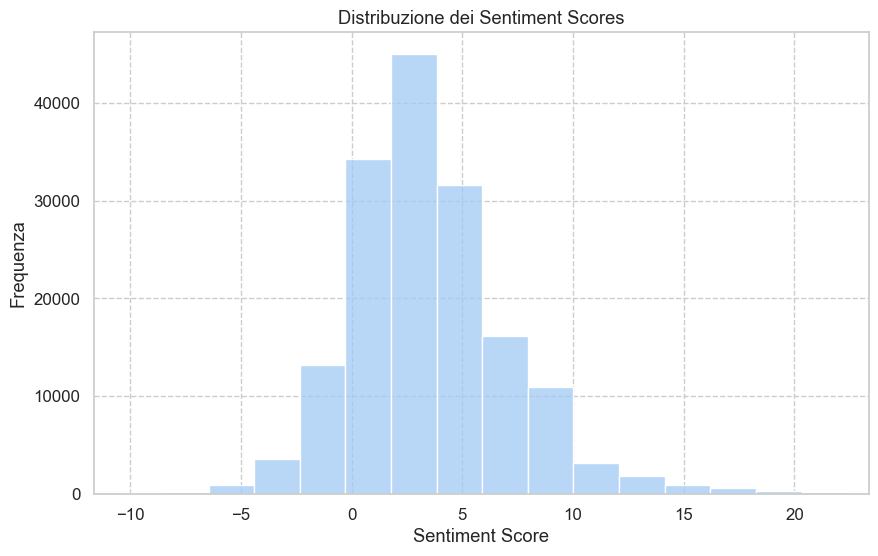

In [7]:
# Visualizza la distribuzione dei sentiment scores utilizzando Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment_score'], bins=50)
plt.title('Distribuzione dei Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequenza')
# Setta il limite sull'asse X per visualizzare meglio le recensioni
plt.xlim(df['sentiment_score'].mean() - 15, df['sentiment_score'].mean() + 20)
plt.savefig(images_bing_liu_path + "distribuzione_sentiment_score.png", 
            dpi=300, 
            bbox_inches='tight')
plt.show()
# la cosa incredibile è l'andamento gaussiano!

In [8]:
# VALUTIAMO LE PERFORMANCE DEL MODELLO Rule-Based

# Calcolo la matrice di confusione
conf_matrix = confusion_matrix(df['sentiment'], df['predicted_sentiment'])

# Calcolo il classification report
class_report = classification_report(df['sentiment'], df['predicted_sentiment'])

# Stampo il classification report
print(class_report)

# Stampo la matrice di confusione testuale
print(conf_matrix)

              precision    recall  f1-score   support

           0       0.81      0.32      0.46     82037
           1       0.58      0.92      0.71     82037

    accuracy                           0.62    164074
   macro avg       0.69      0.62      0.58    164074
weighted avg       0.69      0.62      0.58    164074

[[26385 55652]
 [ 6352 75685]]


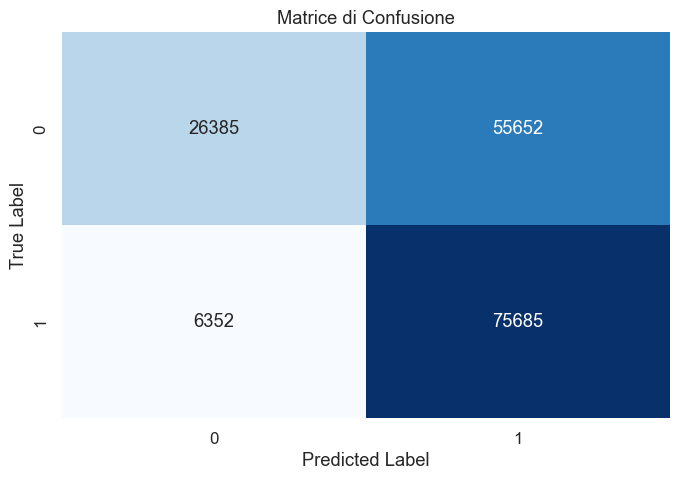

In [9]:
# Visualizza la matrice di confusione usando Seaborn
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matrice di Confusione')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig(images_bing_liu_path + "confusion_matrix.png",
            dpi=300,
            bbox_inches='tight')
plt.tight_layout()
plt.show()

## Report di Classificazione

### Classe 0 (Negativa)
- **Precisione**: 0.81  
  _Quando il modello predice un sentimento negativo, è corretto l'81% delle volte._
- **Recall**: 0.32  
  _Il modello rileva solo il 32% dei veri sentimenti negativi._

### Classe 1 (Positiva)
- **Precisione**: 0.58  
  _Molte predizioni positive sono in realtà negative._
- **Recall**: 0.92  
  _Il modello rileva il 92% dei veri sentimenti positivi._

### F1-Score
- **Classe 1**: 0.71  
  _Suggerisce che il modello performa meglio nel rilevare sentimenti positivi rispetto ai negativi._
- **Classe 0**: 0.46  

### Accuratezza del Modello
- **Accuratezza Totale**: 0.62  
  _Il 62% di tutte le predizioni è corretto._

### Medie
- **Media Macro**: Precisione 0.69, Ricordo 0.62, F1-score 0.58
- **Media Ponderata**: Precisione 0.69, Ricordo 0.62, F1-score 0.58  
  _Le metriche ponderate sono identiche alle metriche macro in questo caso perché il supporto è lo stesso per entrambe le classi._



In [10]:
# fine modello Rule-Based